In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
traindf=pd.read_csv('data/train.csv')
testdf=pd.read_csv('data/test.csv')

In [3]:
traindf.head()

,ID,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,9580,0.668999,58,2,0.449504,3425.0,9,1,1,1,1.0,0
1,39755,0.015922,71,0,6.000000,NaN,5,0,0,0,0.0,0
2,118799,0.183062,52,1,0.035593,5000.0,9,0,0,0,0.0,0
3,16489,0.162301,77,0,0.227886,2000.0,8,0,0,0,0.0,0
4,149857,0.404199,30,0,0.026010,5843.0,4,0,0,0,0.0,0


<Axes: >

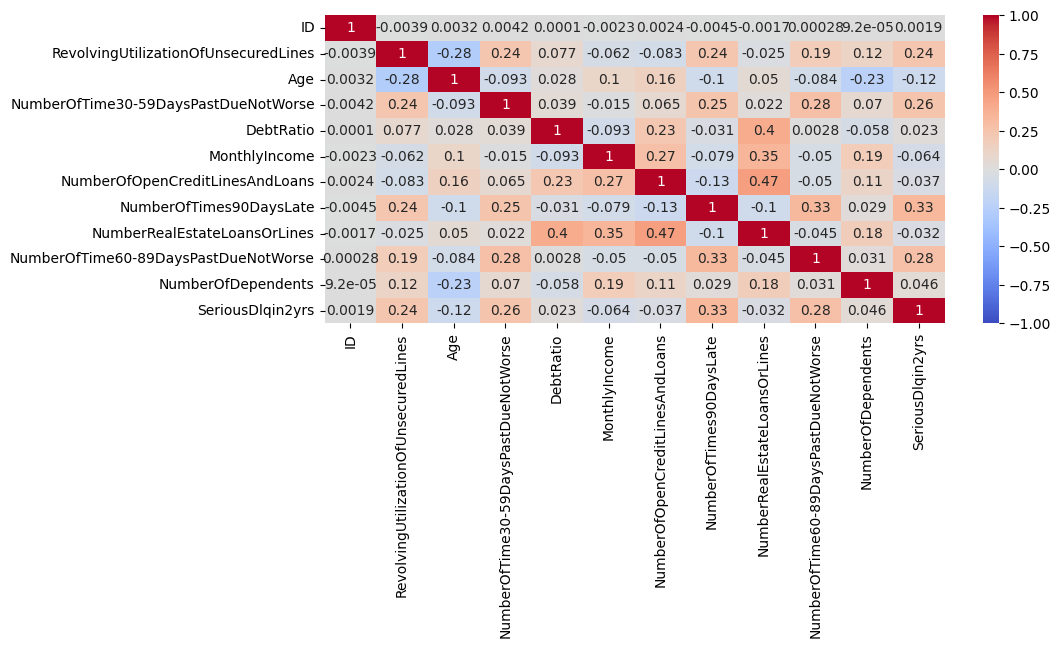

In [25]:
#METER EN FUNCT VISUALIZ
plt.figure(figsize=(10,4))
sns.heatmap(traindf.corr(method='spearman'),cmap='coolwarm',vmin=-1,annot=True)

In [5]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    105000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  105000 non-null  float64
 2   Age                                   105000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  105000 non-null  int64  
 4   DebtRatio                             105000 non-null  float64
 5   MonthlyIncome                         84164 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       105000 non-null  int64  
 7   NumberOfTimes90DaysLate               105000 non-null  int64  
 8   NumberRealEstateLoansOrLines          105000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  105000 non-null  int64  
 10  NumberOfDependents                    102236 non-null  float64
 11  

In [51]:
traindf['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
0    98016
1     6984
Name: count, dtype: int64

In [6]:
traindf.describe()

,ID,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
count,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,8.416400e+04,105000.000000,105000.000000,105000.000000,105000.000000,102236.000000,105000.000000
mean,75006.458152,5.378324,52.325610,0.409352,352.044192,6.703641e+03,8.459952,0.254619,1.019010,0.228762,0.757933,0.066514
std,43315.742022,201.573457,14.766425,4.056717,1820.229318,1.622288e+04,5.134329,4.032506,1.131065,4.017864,1.115273,0.249180
min,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37590.750000,0.029974,41.000000,0.000000,0.174950,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74941.500000,0.154252,52.000000,0.000000,0.366061,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,112542.500000,0.556035,63.000000,0.000000,0.870083,8.250000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000
max,149999.000000,29110.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000,1.000000


In [78]:
traindf['MonthlyIncome'].fillna(traindf['MonthlyIncome'].median(), inplace=True)
traindf['NumberOfDependents'].fillna(traindf['NumberOfDependents'].median(), inplace=True)

testdf['MonthlyIncome'].fillna(testdf['MonthlyIncome'].median(), inplace=True)
testdf['NumberOfDependents'].fillna(testdf['NumberOfDependents'].median(), inplace=True)

In [79]:
X=traindf.drop(columns='SeriousDlqin2yrs')
# X=traindf[['RevolvingUtilizationOfUnsecuredLines', 'Age','NumberOfTime30-59DaysPastDueNotWorse',
        #    'NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse']]
y=traindf['SeriousDlqin2yrs']

In [80]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = rus.fit_resample(X, y)

In [75]:
testdf.columns

Index(['ID', 'RevolvingUtilizationOfUnsecuredLines', 'Age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [81]:
Xt=testdf[['ID', 'RevolvingUtilizationOfUnsecuredLines', 'Age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']]
# Xt=testdf[['RevolvingUtilizationOfUnsecuredLines', 'Age','NumberOfTime30-59DaysPastDueNotWorse',
        #    'NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse']]

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,multilabel_confusion_matrix, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.metrics import accuracy_score

In [ ]:
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_resampled, y_resampled)

In [83]:
model1.score(X_resampled, y_resampled)

0.6610108820160366

In [84]:
y_pred1=model1.predict(X_resampled)

In [85]:
roc_auc_score(y_resampled, y_pred1)

0.6610108820160366

In [86]:
y_predT1=model1.predict(Xt)

In [16]:
# EXPORT
submission2 = pd.DataFrame({'ID': testdf['ID'].values, 'SeriousDlqin2yrs': y_predT1})
submission2.to_csv('submission2.csv', index=False)

### Pipeline con random forest y gradient boosting

In [22]:
import scipy.stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score


In [87]:
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("classifier", RandomForestClassifier())
])
rf_params = {
    'scaler': [StandardScaler(), None],
    'selectkbest__k':np.arange(5,15),
    'classifier': [RandomForestClassifier()],
    'classifier__max_depth': [3,5,7]
}
gb_params = {
    'scaler': [StandardScaler(), None],
    'selectkbest__k':np.arange(5,15),
    'classifier': [GradientBoostingClassifier()],
    'classifier__max_depth': [3,5,7]
}
search_space = [
    rf_params,
    gb_params]

In [88]:
clf_gs = GridSearchCV(estimator=pipe, param_grid=search_space, cv=5, scoring="roc_auc", verbose=3, n_jobs=-1)

In [2]:
# clf_gs.fit(X_resampled, y_resampled)

In [90]:
print(clf_gs.best_estimator_)
print(clf_gs.best_score_)
print(clf_gs.best_params_)

Pipeline(steps=[('scaler', None), ('selectkbest', SelectKBest(k=11)),
                ('classifier', GradientBoostingClassifier())])
0.8642224222346572
{'classifier': GradientBoostingClassifier(), 'classifier__max_depth': 3, 'scaler': None, 'selectkbest__k': 11}


In [91]:
final_model2 = clf_gs.best_estimator_
final_model2.fit(X_resampled,y_resampled)
y_predT3 = final_model2.predict(Xt)

In [45]:
final_model2.score(X_resampled, y_resampled)
roc_auc_score(y_resampled, final_model2.predict(X_resampled))

0.7875143184421535

In [97]:
# EXPORT
submission6 = pd.DataFrame({'ID': testdf['ID'].values, 'SeriousDlqin2yrs': y_predT3})
submission6.to_csv('submission6.csv', index=False)

repeat with randomized search

In [3]:
# clf_rs=RandomizedSearchCV(estimator=pipe, param_distributions=search_space,
#                           cv=5, scoring="roc_auc", verbose=3, n_jobs=-1, n_iter=100)
# clf_rs.fit(X_resampled, y_resampled)

# print(clf_rs.best_estimator_)
# print(clf_rs.best_score_)
# print(clf_rs.best_params_)

In [53]:
final_modelB = clf_rs.best_estimator_
final_modelB.fit(X_resampled, y_resampled)
y_predT3 = final_modelB.predict(Xt)

In [51]:
final_modelB.score(X_resampled, y_resampled)
roc_auc_score(y_resampled, final_modelB.predict(X_resampled))

0.7875143184421535

### (Dividing train / test)

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=0)

In [4]:
# model2 = LogisticRegression(max_iter=1000)
# model2.fit(X_train, Y_train)

In [5]:
# predictions = model2.predict(X_resampled)
# roc_auc_score(y_resampled, predictions)

pipeline, gradient boost w/ train-test

In [ ]:
clf_gs.fit(X_train, Y_train)
print(clf_gs.best_estimator_)
print(clf_gs.best_score_)
print(clf_gs.best_params_)

In [95]:
final_model_split = clf_gs.best_estimator_
final_model_split.fit(X_resampled,y_resampled)
y_pred_split = final_model_split.predict(Xt)

final_model_split.score(X_resampled, y_resampled)
roc_auc_score(y_resampled, final_model2.predict(X_resampled))

0.7993986254295532

In [98]:
# EXPORT
submission7 = pd.DataFrame({'ID': testdf['ID'].values, 'SeriousDlqin2yrs': y_pred_split})
submission7.to_csv('submission7.csv', index=False)